## Why it’s extremely difficult to buy a first home in Minnesota right now? 
> Why it’s extremely difficult to buy a first home in Minnesota right now? You want to buy a house of your own. You can’t find a lot in your price range. 

<img src="images/zillow_icon.png" alt="Alt text that describes the graphic" title="Title text" />  Thank you Zillow!
> Using Zillow we will demonstrate how several factors, including rising home prices, high demand and low inventory have conspired to make now an especially difficult time to get a foot in the door of home ownership. 

In [1]:
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
from dateutil.relativedelta import relativedelta
from datetime import datetime
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
engine = create_engine("sqlite:///zdatNew.sqlite")
conn = engine.connect()

In [3]:
# To push the objects made and query the server we use a Session object
session = Session(bind=engine)

In [4]:
Zillow_data_df = pd.read_sql('select * from zilloData', conn) #medianvalue is the table with sales prices
#medianvalue_df = pd.read_sql('select * from medianvalue', conn)


### Now we are ready to get the values we need 

<img src="images/data-cleaning4.png" alt="Alt text that describes the graphic" title="Title text" /> 

In [5]:

Zillow_data_df.head()

,index,RegionName,Date,Number_of_Listings,Year,Month,Median_sqft_Value
0,0,Minneapolis,2013-01,1082.0,2013,01,151.0
1,1,Saint Paul,2013-01,726.0,2013,01,108.0
2,2,Rochester,2013-01,435.0,2013,01,141.0
3,3,Duluth,2013-01,532.0,2013,01,141.0
4,4,Bloomington,2013-01,190.0,2013,01,149.0


In [6]:
Zillow_data_df.set_index('RegionName')
Zillow_data_df.head()

,index,RegionName,Date,Number_of_Listings,Year,Month,Median_sqft_Value
0,0,Minneapolis,2013-01,1082.0,2013,01,151.0
1,1,Saint Paul,2013-01,726.0,2013,01,108.0
2,2,Rochester,2013-01,435.0,2013,01,141.0
3,3,Duluth,2013-01,532.0,2013,01,141.0
4,4,Bloomington,2013-01,190.0,2013,01,149.0


##### We will look at listings in Minneapolis and St. Paul only 

In [7]:
#Cleaning the data
#scale down the table to only include Minneapolis and St.Paul

array = ['Minneapolis', 'Saint Paul']
TwinCitiesListings_df = Zillow_data_df.loc[Zillow_data_df['RegionName'].isin(array)]

In [8]:
#TwinCities_listings_by_month['date'] = TwinCities_listings_by_month['index']
TwinCitiesListings_df = TwinCitiesListings_df.drop('index',axis = 1)


#### Number of listings and median value per square foot for Minneapolis and St. Paul for each month 2013 - 2019 

In [9]:
TwinCitiesListings_df.head(5)

,RegionName,Date,Number_of_Listings,Year,Month,Median_sqft_Value
0,Minneapolis,2013-01,1082.0,2013,01,151.0
1,Saint Paul,2013-01,726.0,2013,01,108.0
139,Minneapolis,2013-02,1072.0,2013,02,153.0
140,Saint Paul,2013-02,706.0,2013,02,109.0
278,Minneapolis,2013-03,1142.0,2013,03,153.0


#### Number of listings and median sqft values for the Mpls and St. Paul combined (Twins Cities) for each year 2013 - 2019 

In [10]:
listings_by_year = TwinCitiesListings_df.groupby("Year")["Number_of_Listings"].sum()
sqft_values = TwinCitiesListings_df.groupby("Year")["Median_sqft_Value"].sum()
listings_by_year = pd.DataFrame(listings_by_year)
listings_by_year['sqft_cost'] = sqft_values
listings_by_year= listings_by_year.reset_index()

In [11]:
listings_by_year.head()

,Year,Number_of_Listings,sqft_cost
0,2013,25913.0,3289.0
1,2014,29229.0,3642.0
2,2015,27598.0,3870.0
3,2016,25696.0,4192.0
4,2017,19411.0,4575.0


#### Max Median Cost per square foot for each year 2013 - 2019
>  _**Note 2019 only has one month of data_


In [12]:
Max_cost_per_sqft = TwinCitiesListings_df.loc[TwinCitiesListings_df.groupby('Year')['Median_sqft_Value'].idxmax()]
Max_cost_per_sqft

,RegionName,Date,Number_of_Listings,Year,Month,Median_sqft_Value
1390,Minneapolis,2013-11,1408.0,2013,11,165.0
3197,Minneapolis,2014-12,1304.0,2014,12,173.0
4865,Minneapolis,2015-12,1073.0,2015,12,187.0
6533,Minneapolis,2016-12,738.0,2016,12,203.0
8201,Minneapolis,2017-12,698.0,2017,12,219.0
9869,Minneapolis,2018-12,888.0,2018,12,233.0
10008,Minneapolis,2019-01,870.0,2019,01,234.0


#### Number of listings and the median cost per square foot in the Twins Cities for the month of June from 2013 - 2019 

In [13]:
listings_june = TwinCitiesListings_df.loc[TwinCitiesListings_df['Month'] == '06']
listings_june


,RegionName,Date,Number_of_Listings,Year,Month,Median_sqft_Value
695,Minneapolis,2013-06,1368.0,2013,06,155.0
696,Saint Paul,2013-06,817.0,2013,06,114.0
2363,Minneapolis,2014-06,1564.0,2014,06,172.0
2364,Saint Paul,2014-06,1117.0,2014,06,133.0
4031,Minneapolis,2015-06,1488.0,2015,06,180.0
4032,Saint Paul,2015-06,1009.0,2015,06,141.0
5699,Minneapolis,2016-06,1499.0,2016,06,195.0
5700,Saint Paul,2016-06,1169.0,2016,06,151.0
7367,Minneapolis,2017-06,1014.0,2017,06,212.0
7368,Saint Paul,2017-06,691.0,2017,06,170.0


### Let's Plot! 

#### How to Normalize 

In [14]:
listings_by_year.keys()

Index(['Year', 'Number_of_Listings', 'sqft_cost'], dtype='object')

In [15]:
#Normalize by year
listings_test = listings_by_year.assign(sqft_values_norm = listings_by_year.sqft_cost.values / listings_by_year.sqft_cost.values.max(),
                                num_listings_norm = listings_by_year.Number_of_Listings.values / listings_by_year.Number_of_Listings.values.max())

In [16]:
listings_test.keys()

Index(['Year', 'Number_of_Listings', 'sqft_cost', 'sqft_values_norm',
       'num_listings_norm'],
      dtype='object')

##### NOT Normalized bar chart

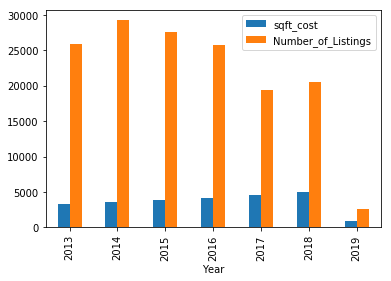

In [17]:
median_chart = listings_by_year.plot(x = 'Year',y=['sqft_cost', 'Number_of_Listings'], kind='bar')

plt.show()


#### NORMALIZED!! Bar chart

### Here you can see that as the median cost of houses rise the number of listing get lower

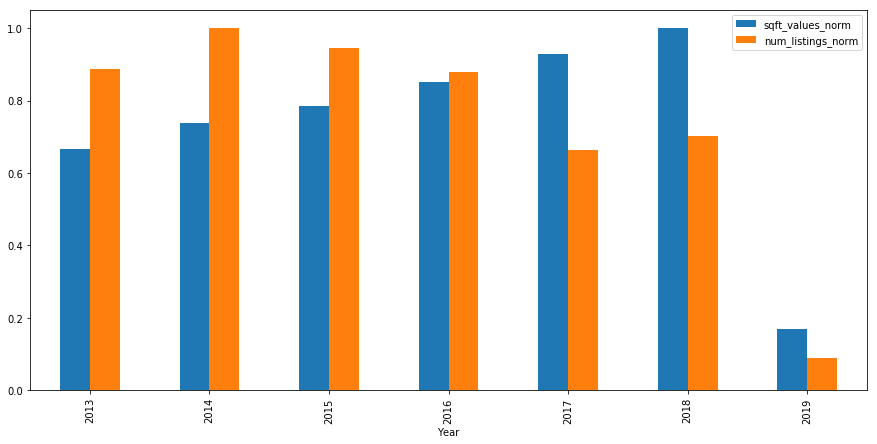

<Figure size 1440x720 with 0 Axes>

In [18]:

median_chart = listings_test.plot(x = 'Year',y=['sqft_values_norm', 'num_listings_norm'], figsize=(15,7), kind='bar')
plt.figure(figsize=(20,10))

plt.show()

([<matplotlib.patches.Wedge at 0x1f4c256c7f0>,
 [Text(-1.0539570884387184, 0.3149197607800749, '2013'),
  Text(-0.9267022647234999, -0.5926406268189319, '2014'),
  Text(-0.07745311341283559, -1.097269800560764, '2015'),
  Text(0.8811743898332548, -0.6584312376414042, '2016'),
  Text(0.9927604186259387, 0.4737370063755324, '2017'),
  Text(-0.05815454703121194, 1.0984616737326773, '2018'),
  Text(-0.7644806845414049, 0.7909293792514633, '2019')],
 [Text(-0.5748856846029372, 0.17177441497094992, '13.0%'),
  Text(-0.5054739625764544, -0.3232585237194174, '14.4%'),
  Text(-0.042247152770637585, -0.5985108003058712, '15.3%'),
  Text(0.48064057627268436, -0.35914431144076586, '16.5%'),
  Text(0.5415056828868756, 0.2584020034775631, '18.1%'),
  Text(-0.03172066201702469, 0.5991609129450967, '19.5%'),
  Text(-0.41698946429531175, 0.4314160250462527, '3.3%')])

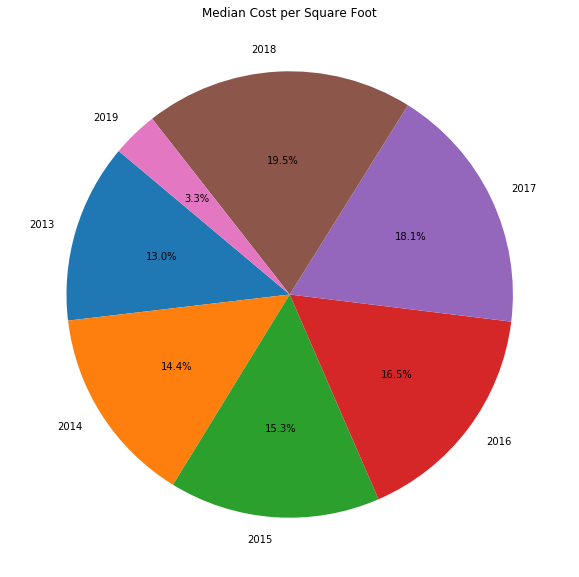

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

# Labels for the sections of our pie chart
labels_cost = listings_by_year['Year']
labels_listings = listings_by_year['Year']

cost_data = listings_by_year['sqft_cost']
Listings_data = listings_by_year['Number_of_Listings']

# Set a Title and labels
plt.title("Median Cost per Square Foot")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(cost_data, labels=labels_cost, autopct="%1.1f%%", startangle=140)

#median_pie = listings_by_year.plot(x = ['sqft_cost', 'Number_of_Listings'],y=['sqft_cost', 'Number_of_Listings'], kind='pie')


([<matplotlib.patches.Wedge at 0x1f4c2542128>,
 [Text(-1.0861337516303418, 0.1741076493707248, '2013'),
  Text(-0.6050143126462578, -0.9186716940742087, '2014'),
  Text(0.6211479112528608, -0.9078409950790988, '2015'),
  Text(1.0895179598959608, 0.1514946040759998, '2016'),
  Text(0.5216373134833625, 0.9684495408547935, '2017'),
  Text(-0.3630723756983889, 1.0383537210434257, '2018'),
  Text(-0.8026040075605263, 0.7522146017246559, '2019')],
 [Text(-0.5924365917983682, 0.09496780874766807, '17.2%'),
  Text(-0.3300078068979588, -0.5010936513132047, '19.4%'),
  Text(0.3388079515924695, -0.495185997315872, '18.3%'),
  Text(0.5942825235796149, 0.08263342040509078, '17.0%'),
  Text(0.28452944371819766, 0.5282452041026146, '12.9%'),
  Text(-0.19803947765366664, 0.5663747569327776, '13.6%'),
  Text(-0.4377840041239234, 0.4102988736679941, '1.7%')])

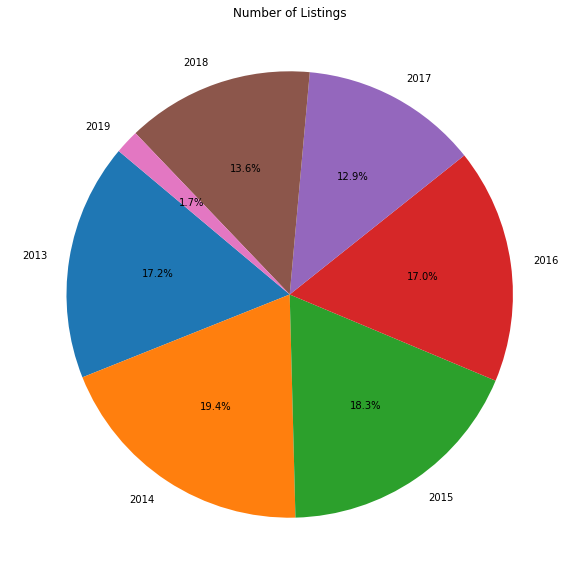

In [20]:
plt.figure(figsize=(10,10))
# Set a Title and labels
plt.title("Number of Listings")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.pie(Listings_data, labels=labels_listings, autopct="%1.1f%%", startangle=140)

([<matplotlib.patches.Wedge at 0x1f4c28cecf8>,
 [Text(-1.0861337516303418, 0.1741076493707248, '2013'),
  Text(-0.6050143126462578, -0.9186716940742087, '2014'),
  Text(0.6211479112528608, -0.9078409950790988, '2015'),
  Text(1.0895179598959608, 0.1514946040759998, '2016'),
  Text(0.5216373134833625, 0.9684495408547935, '2017'),
  Text(-0.3630723756983889, 1.0383537210434257, '2018'),
  Text(-0.8026040075605263, 0.7522146017246559, '2019')],
 [Text(-0.5924365917983682, 0.09496780874766807, '17.2%'),
  Text(-0.3300078068979588, -0.5010936513132047, '19.4%'),
  Text(0.3388079515924695, -0.495185997315872, '18.3%'),
  Text(0.5942825235796149, 0.08263342040509078, '17.0%'),
  Text(0.28452944371819766, 0.5282452041026146, '12.9%'),
  Text(-0.19803947765366664, 0.5663747569327776, '13.6%'),
  Text(-0.4377840041239234, 0.4102988736679941, '1.7%')])

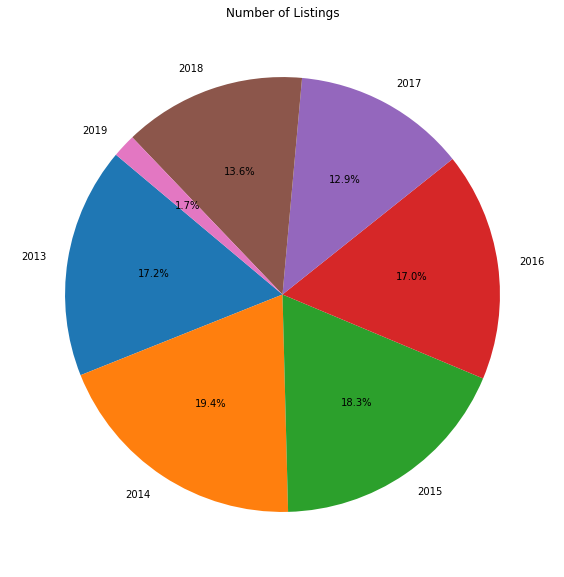

In [21]:
plt.figure(figsize=(10,10))
# Set a Title and labels
plt.title("Number of Listings")

plt.pie(Listings_data, labels=labels_listings, autopct="%1.1f%%", startangle=140)

#### Here are the number of listings at the highest median cost of housing  

In [22]:
#Normalize by year
listings_max = Max_cost_per_sqft.assign(sqft_values_norm = Max_cost_per_sqft.Median_sqft_Value.values / Max_cost_per_sqft.Median_sqft_Value.values.max(),
                                num_listings_norm = Max_cost_per_sqft.Number_of_Listings.values / Max_cost_per_sqft.Number_of_Listings.values.max())

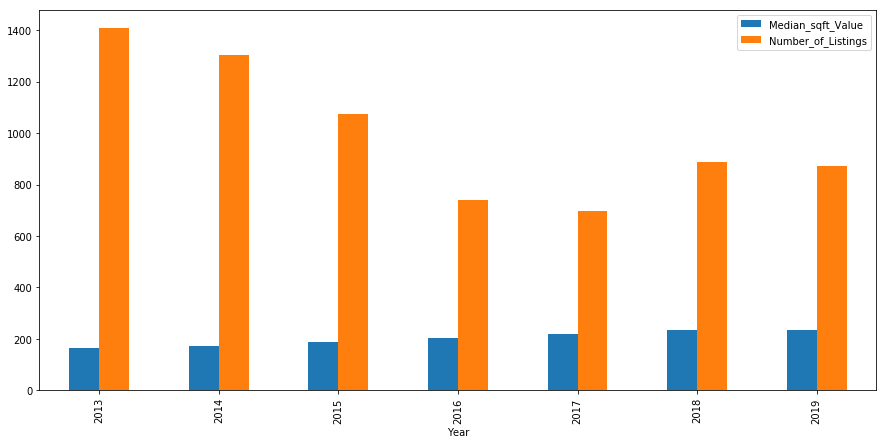

In [23]:
Max_chart = listings_max.plot(x ='Year',y=['Median_sqft_Value', 'Number_of_Listings'], figsize=(15,7), kind='bar') 

### Here you can see the rise in cost from 2013 - 2019 

In [24]:
#Normalize by year
June_listings = listings_june.assign(sqft_values_norm = listings_june.Median_sqft_Value.values / listings_june.Median_sqft_Value.values.max(),
                                num_listings_norm = listings_june.Number_of_Listings.values / listings_june.Number_of_Listings.values.max())

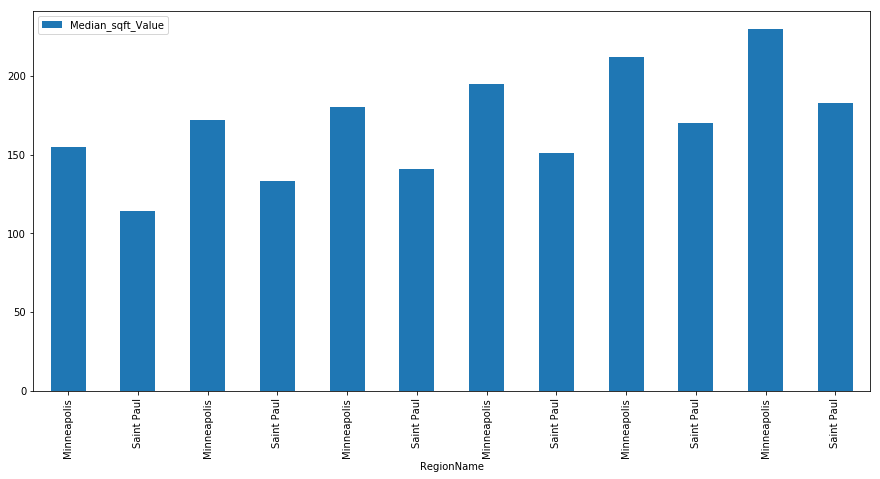

In [25]:
june_chart = listings_june.plot(x ='RegionName',y=['Median_sqft_Value'], figsize=(15,7), kind='bar')

plt.show()
